In [73]:
import os
import shutil
from pathlib import Path
from os import getcwd, makedirs
from os.path import isfile, join

import albumentations as A
import cv2
import imutils
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from src import image_processing
import src.utils as u
from kaggle.api.kaggle_api_extended import KaggleApi

In [75]:
KaggleApi().authenticate()
kaggle_path = kagglehub.dataset_download("arct22/codebrim-balanced", force_download=True)

  1%|          | 112M/11.4G [00:04<08:18, 24.3MB/s]   


KeyboardInterrupt: 

In [236]:
import xmltodict

with open(u.join_cwd(kaggle_path, 'metadata', 'defects.xml'), "r") as file:
    defects_dict = xmltodict.parse(file.read())
with open(u.join_cwd(kaggle_path, 'metadata', 'background.xml'), "r") as file:
    bg_dict = xmltodict.parse(file.read())

defects_df = pd.DataFrame(defects_dict['Annotation']['Defect'])
bg_df = pd.DataFrame(bg_dict['Annotation']['Defect'])
df = pd.concat([defects_df, bg_df])
df[df.columns.values[1:]] = df[df.columns.values[1:]].astype(int)



In [233]:
df.isna().sum()

@name             0
Background        0
Crack             0
Spallation        0
Efflorescence     0
ExposedBars       0
CorrosionStain    0
dtype: int64

### Label preprocessing

In [6]:
train_imgs = os.listdir(os.path.join(kaggle_path, 'train', 'defects'))
train_imgs = [os.path.join(kaggle_path, 'train', 'defects', img_path) for img_path in train_imgs]

In [204]:
labels_dict = {
    'train': [],
    'test': [],
    'val': []
}

for split in ['train', 'test', 'val']:
    labels = []

    src_imgs_dir = join(kaggle_path, split, 'defects')
    src_bg_dir = join(kaggle_path, split, 'background')

    print(src_imgs_dir)
    print(src_bg_dir)

    for img in os.listdir(src_imgs_dir):
        label_name = img.split('.')[0] + '.txt'

    imgs = os.listdir(src_imgs_dir)

    for i, data in df[df['@name'] == img].groupby('@name'):


    for img in imgs:
        for i, data in df[df['@name'] == img].groupby('@name'):
            labels_dict['train'].append(data)

train_df = pd.DataFrame.from_dict(labels_dict['train'])
test_df = pd.DataFrame.from_dict(labels_dict['test']).iloc[1]
val_df = pd.DataFrame.from_dict(labels_dict['val']).iloc[1]



IndentationError: expected an indented block after 'for' statement on line 21 (4135274206.py, line 24)

[]

In [40]:
train_df

,@name,Background,Crack,Spallation,Efflorescence,ExposedBars,CorrosionStain
0,image_0000005_crop_0000001.png,0,0,0,1,0,1
1,image_0000005_crop_0000001_copy00.png,0,0,0,1,0,1
2,image_0000005_crop_0000001_copy01.png,0,0,0,1,0,1
3,image_0000005_crop_0000001_copy02.png,0,0,0,1,0,1
4,image_0000005_crop_0000002.png,0,0,0,1,0,1
...,...,...,...,...,...,...,...
7019,image_0001599_crop_0000007.png,0,0,0,0,0,1
7020,image_0001599_crop_0000008.png,0,0,0,1,0,1
7021,image_0001599_crop_0000008_copy00.png,0,0,0,1,0,1
7022,image_0001599_crop_0000008_copy01.png,0,0,0,1,0,1


In [38]:
print(df.columns.values)

for split_df in [train_df, test_df, val_df]:
    print(split_df)
    split_df.columns = df.columns.values.tolist()

['@name' 'Background' 'Crack' 'Spallation' 'Efflorescence' 'ExposedBars'
 'CorrosionStain']
                                          0  1  2  3  4  5  6
0            image_0000005_crop_0000001.png  0  0  0  1  0  1
1     image_0000005_crop_0000001_copy00.png  0  0  0  1  0  1
2     image_0000005_crop_0000001_copy01.png  0  0  0  1  0  1
3     image_0000005_crop_0000001_copy02.png  0  0  0  1  0  1
4            image_0000005_crop_0000002.png  0  0  0  1  0  1
...                                     ... .. .. .. .. .. ..
7019         image_0001599_crop_0000007.png  0  0  0  0  0  1
7020         image_0001599_crop_0000008.png  0  0  0  1  0  1
7021  image_0001599_crop_0000008_copy00.png  0  0  0  1  0  1
7022  image_0001599_crop_0000008_copy01.png  0  0  0  1  0  1
7023  image_0001599_crop_0000008_copy02.png  0  0  0  1  0  1

[7024 rows x 7 columns]
0    image_0000084_crop_0000001.png
1                                 0
2                                 0
3                              

In [14]:
for labels in labels_dict:
    label_filename = labels.split('.')[0] + '.txt'
    label_path = join(Path(getcwd()).parent.parent, 'datasets', 'org', 'labels', label_filename)
    with open(label_path, 'w' ) as f:


{'train': [[['image_0000005_crop_0000001.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000005_crop_0000001_copy00.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000005_crop_0000001_copy01.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000005_crop_0000001_copy02.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000005_crop_0000002.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000005_crop_0000002_copy00.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000005_crop_0000002_copy01.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000005_crop_0000002_copy02.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000021_crop_0000001.png', '0', '0', '0', '1', '0', '0']],
  [['image_0000021_crop_0000001_copy00.png', '0', '0', '0', '1', '0', '0']],
  [['image_0000021_crop_0000001_copy01.png', '0', '0', '0', '1', '0', '0']],
  [['image_0000021_crop_0000001_copy02.png', '0', '0', '0', '1', '0', '0']],
  [['image_0000028_crop_0000001.png', '0', '0', '0', '1', '0', '1']],
  [['image_0000028

In [58]:
def resize_with_org_aspect_ratio(img_path:str) -> cv2.Mat:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height = image.shape[0]
    width = image.shape[1]

    if height > width:
        image = imutils.resize(image, height=height)
    else:
        image = imutils.resize(image, width=width)

    return image

In [63]:
def pad_image(image:cv2.typing.MatLike, bboxes: list[int], target_height: int, target_width: int) -> tuple[cv2.Mat, list[int]]:
    height, width, channels = image.shape
    bbox_params = A.BboxParams('albumentations')
    if height > width:
        padval = int((target_width - width) / 2)
        transform = A.Compose([
            A.Pad(padding=(0, padval))
        ], bbox_params=bbox_params)
    else:
        padval = int((target_height - height) / 2)
        transform = A.Compose([
            A.Pad(padding=(padval, 0))
        ])

    transformed = transform(image=image, bboxes=bboxes, label_fields=[[0]])

    return transformed['image'], transformed['bboxes']

In [65]:
img = resize_with_org_aspect_ratio(
    img_path=r'C:\Users\Hubert\Downloads\CODEBRIM_classification_balanced_dataset\classification_dataset_balanced\test\defects\image_0000077_crop_0000001.png'
)

pad = pad_image(img, [[0, 1, 1, 0]], 640, 640)

ValueError: y_max is less than or equal to y_min for bbox [0. 1. 1. 0. 0.].

In [67]:
import tensorflow as tf

def resize_with_padding(image, target_size=640):
    # Convert to float32 if not already
    if image.dtype != tf.float32:
        image = tf.cast(image, tf.float32)

    # Get current dimensions
    shape = tf.shape(image)
    height = tf.cast(shape[0], tf.float32)
    width = tf.cast(shape[1], tf.float32)

    # Calculate new dimensions while maintaining aspect ratio
    ratio = target_size / tf.maximum(height, width)
    new_height = tf.cast(height * ratio, tf.int32)
    new_width = tf.cast(width * ratio, tf.int32)

    # Resize the image
    resized_image = tf.image.resize(image, [new_height, new_width])

    # Calculate padding
    pad_height = target_size - new_height
    pad_width = target_size - new_width

    # Add padding
    paddings = tf.convert_to_tensor([
        [pad_height // 2, pad_height - pad_height // 2],  # Top, Bottom
        [pad_width // 2, pad_width - pad_width // 2],     # Left, Right
        [0, 0]                                            # Channels (no padding)
    ])

    padded_image = tf.pad(resized_image, paddings, constant_values=0)

    return padded_image

# Example usage:
'''
# Load an image
image = tf.keras.preprocessing.image.load_img('path_to_image.jpg')
image = tf.keras.preprocessing.image.img_to_array(image)

# Resize and pad the image
processed_image = resize_with_padding(image)
'''
import tensorflow as tf
image = tf.keras.preprocessing.image.load_img(r'C:\Users\Hubert\Downloads\CODEBRIM_classification_balanced_dataset\classification_dataset_balanced\test\defects\image_0000077_crop_0000001.png')
image = tf.keras.preprocessing.image.img_to_array(image)

processed_image = resize_with_padding(image)

In [70]:
import tensorflow as tf

def resize_with_padding(image, target_size=640):
    # Convert to float32 if not already
    if image.dtype != tf.float32:
        image = tf.cast(image, tf.float32)

    # Get current dimensions
    shape = tf.shape(image)
    height = tf.cast(shape[0], tf.float32)
    width = tf.cast(shape[1], tf.float32)

    # Calculate new dimensions while maintaining aspect ratio
    ratio = target_size / tf.maximum(height, width)
    new_height = tf.cast(height * ratio, tf.int32)
    new_width = tf.cast(width * ratio, tf.int32)

    # Resize the image
    resized_image = tf.image.resize(image, [new_height, new_width])

    # Calculate padding
    pad_height = target_size - new_height
    pad_width = target_size - new_width

    # Calculate padding for each side
    top_pad = pad_height // 2
    bottom_pad = pad_height - pad_height // 2
    left_pad = pad_width // 2
    right_pad = pad_width - pad_width // 2

    # Add padding
    paddings = tf.convert_to_tensor([
        [top_pad, bottom_pad],    # Top, Bottom
        [left_pad, right_pad],    # Left, Right
        [0, 0]                    # Channels (no padding)
    ])

    padded_image = tf.pad(resized_image, paddings, constant_values=0)

    # Create box coordinates [y1, x1, y2, x2] for the non-padded content
    content_box = tf.convert_to_tensor([
        top_pad,                    # y1
        left_pad,                   # x1
        top_pad + new_height,       # y2
        left_pad + new_width        # x2
    ])

    return padded_image, content_box

# Example usage:
'''
# Load an image
image = tf.keras.preprocessing.image.load_img('path_to_image.jpg')
image = tf.keras.preprocessing.image.img_to_array(image)

# Resize and pad the image
processed_image, content_box = resize_with_padding(image)

# content_box contains [y1, x1, y2, x2] coordinates of the actual image content
# You can use these coordinates to know where the padding begins and ends
'''

image = tf.keras.preprocessing.image.load_img(r'C:\Users\Hubert\Downloads\CODEBRIM_classification_balanced_dataset\classification_dataset_balanced\test\defects\image_0000077_crop_0000001.png')
image = tf.keras.preprocessing.image.img_to_array(image)

# Resize and pad the image
processed_image, content_box = resize_with_padding(image)

In [72]:
content_box

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  0, 201, 640, 438])>

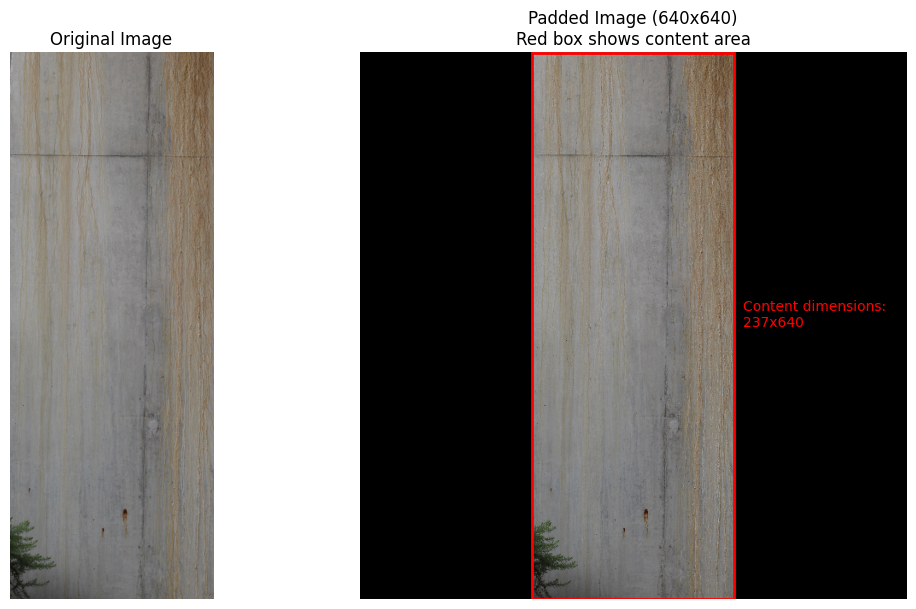

In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def resize_with_padding(image, target_size=640):
    if image.dtype != tf.float32:
        image = tf.cast(image, tf.float32)

    shape = tf.shape(image)
    height = tf.cast(shape[0], tf.float32)
    width = tf.cast(shape[1], tf.float32)

    ratio = target_size / tf.maximum(height, width)
    new_height = tf.cast(height * ratio, tf.int32)
    new_width = tf.cast(width * ratio, tf.int32)

    resized_image = tf.image.resize(image, [new_height, new_width])

    pad_height = target_size - new_height
    pad_width = target_size - new_width

    top_pad = pad_height // 2
    bottom_pad = pad_height - pad_height // 2
    left_pad = pad_width // 2
    right_pad = pad_width - pad_width // 2

    paddings = tf.convert_to_tensor([
        [top_pad, bottom_pad],
        [left_pad, right_pad],
        [0, 0]
    ])

    padded_image = tf.pad(resized_image, paddings, constant_values=0)

    content_box = tf.convert_to_tensor([
        top_pad,
        left_pad,
        top_pad + new_height,
        left_pad + new_width
    ])

    return padded_image, content_box

def plot_padded_image(image, content_box):
    plt.figure(figsize=(12, 6))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(image.astype('uint8'))
    plt.title('Original Image')
    plt.axis('off')

    # Plot padded image with content box
    plt.subplot(1, 2, 2)
    plt.imshow(padded_image.numpy().astype('uint8'))

    # Draw rectangle around content
    y1, x1, y2, x2 = content_box.numpy()
    rect = patches.Rectangle(
        (x1, y1), x2-x1, y2-y1,
        linewidth=2,
        edgecolor='r',
        facecolor='none'
    )
    plt.gca().add_patch(rect)

    plt.title('Padded Image (640x640)\nRed box shows content area')
    plt.axis('off')

    # Add dimensions as text
    content_height = y2 - y1
    content_width = x2 - x1
    plt.text(
        x2 + 10,
        (y1 + y2) / 2,
        f'Content dimensions:\n{int(content_width)}x{int(content_height)}',
        color='red'
    )

    plt.tight_layout()
    plt.show()

padded_image, content_box = resize_with_padding(image)
plot_padded_image(image, content_box)

In [76]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
combination_counts = df.groupby(['Background', 'Crack', 'Spallation',
                               'Efflorescence', 'ExposedBars', 'CorrosionStain']).size().reset_index(name='count')

# Sort by count in descending order
combination_counts = combination_counts.sort_values('count', ascending=False)

In [77]:
combination_counts

,Background,Crack,Spallation,Efflorescence,ExposedBars,CorrosionStain,count
29,1,0,0,0,0,0,2490
16,0,1,0,0,0,0,2036
11,0,0,1,0,1,1,1450
4,0,0,0,1,0,0,1420
10,0,0,1,0,1,0,788
20,0,1,0,1,0,0,360
8,0,0,1,0,0,0,307
1,0,0,0,0,0,1,260
21,0,1,0,1,0,1,244
5,0,0,0,1,0,1,201


In [81]:
import pandas as pd



# Create combinations by excluding the '@name' column
feature_columns = ['Background', 'Crack', 'Spallation', 'Efflorescence', 'ExposedBars', 'CorrosionStain']
combinations = df[feature_columns].value_counts()

print("\nCombination counts:")
print("==================")
for combination, count in combinations.items():
    # Convert combination to list of integers for cleaner output
    combo_list = list(map(int, combination))
    print(f"Combination {combo_list}: {count} occurrences")

# Additional statistics
print("\nSummary statistics:")
print("==================")
print(f"Total number of unique combinations: {len(combinations)}")
print(f"Total number of samples: {len(df)}")


Combination counts:
Combination [1, 0, 0, 0, 0, 0]: 2490 occurrences
Combination [0, 1, 0, 0, 0, 0]: 2036 occurrences
Combination [0, 0, 1, 0, 1, 1]: 1450 occurrences
Combination [0, 0, 0, 1, 0, 0]: 1420 occurrences
Combination [0, 0, 1, 0, 1, 0]: 788 occurrences
Combination [0, 1, 0, 1, 0, 0]: 360 occurrences
Combination [0, 0, 1, 0, 0, 0]: 307 occurrences
Combination [0, 0, 0, 0, 0, 1]: 260 occurrences
Combination [0, 1, 0, 1, 0, 1]: 244 occurrences
Combination [0, 0, 0, 1, 0, 1]: 201 occurrences
Combination [0, 1, 1, 0, 1, 1]: 126 occurrences
Combination [0, 0, 0, 0, 1, 0]: 123 occurrences
Combination [0, 0, 0, 0, 1, 1]: 122 occurrences
Combination [0, 1, 1, 0, 0, 0]: 108 occurrences
Combination [0, 0, 1, 0, 0, 1]: 99 occurrences
Combination [0, 1, 0, 0, 0, 1]: 72 occurrences
Combination [0, 0, 0, 0, 0, 0]: 52 occurrences
Combination [0, 0, 1, 1, 0, 1]: 51 occurrences
Combination [0, 0, 1, 1, 0, 0]: 44 occurrences
Combination [0, 1, 1, 0, 1, 0]: 26 occurrences
Combination [0, 0, 1,

C:\Users\Hubert\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Hubert\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


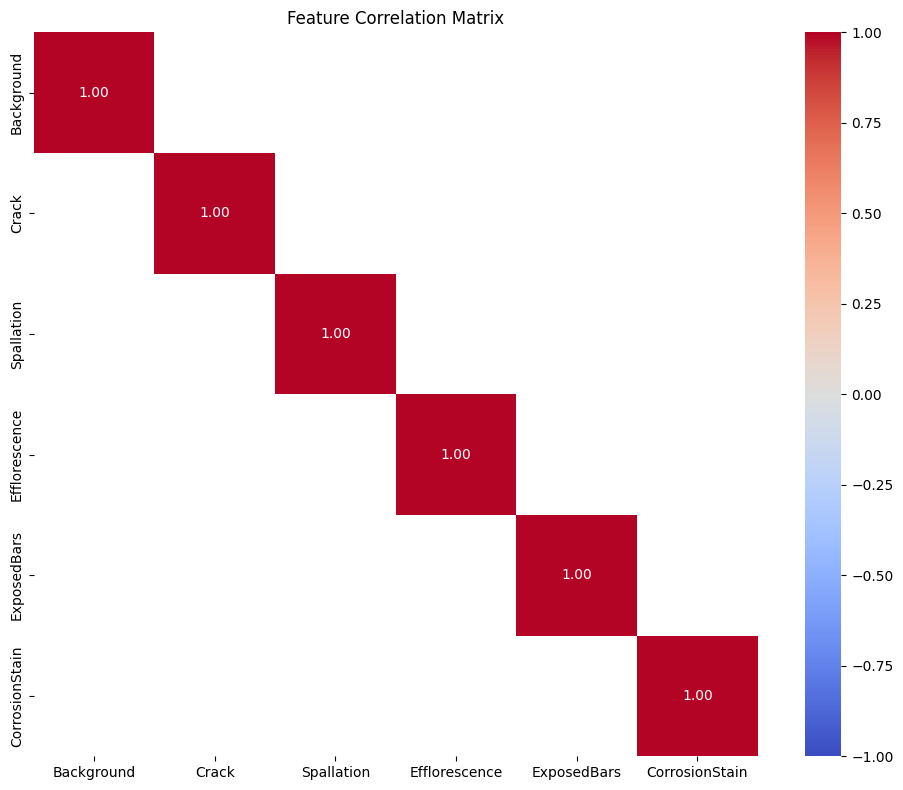


Strongest Correlations:
Background - Crack: nan
Background - Spallation: nan
Background - Efflorescence: nan
Background - ExposedBars: nan
Background - CorrosionStain: nan


In [210]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from itertools import combinations
import scipy.stats as stats

def analyze_combination_importance(df, feature_columns, min_support=0.01):
    """
    Analyze the statistical importance of class combinations.

    Parameters:
    df: DataFrame containing the class combinations
    feature_columns: List of column names for the features
    min_support: Minimum frequency threshold for considering a combination
    """
    total_samples = len(df)

    # 1. Frequency Analysis
    class_combinations = df[feature_columns].value_counts()
    frequent_combinations = class_combinations[class_combinations/total_samples >= min_support]

    print("\n1. Frequent Combinations Analysis:")
    print("================================")
    for combination, count in frequent_combinations.items():
        support = count/total_samples
        print(f"Combination {list(map(int, combination))}")
        print(f"Count: {count}, Support: {support:.3f}")

    # 2. Co-occurrence Analysis
    print("\n2. Feature Co-occurrence Analysis:")
    print("================================")
    for col1, col2 in combinations(feature_columns, 2):
        correlation = df[col1].corr(df[col2])
        mi_score = mutual_info_score(df[col1], df[col2])

        print(f"\n{col1} - {col2}:")
        print(f"Correlation: {correlation:.3f}")
        print(f"Mutual Information: {mi_score:.3f}")

        # Chi-square test for independence
        contingency = pd.crosstab(df[col1], df[col2])
        chi2, p_value = stats.chi2_contingency(contingency)[:2]
        print(f"Chi-square p-value: {p_value:.3f}")

    # 3. Class Balance Analysis
    print("\n3. Class Balance Analysis:")
    print("================================")
    for column in feature_columns:
        value_counts = df[column].value_counts()
        balance_ratio = value_counts.min() / value_counts.max()
        print(f"\n{column}:")
        print(f"Distribution: {dict(value_counts)}")
        print(f"Balance ratio: {balance_ratio:.3f}")

    # 4. Rare Combination Analysis
    rare_combinations = class_combinations[class_combinations/total_samples < min_support]
    print("\n4. Rare Combinations Analysis:")
    print("================================")
    print(f"Number of rare combinations: {len(rare_combinations)}")
    if len(rare_combinations) > 0:
        print("Top 5 rarest combinations:")
        for combination, count in rare_combinations.nsmallest(5).items():
            print(f"Combination {list(map(int, combination))}: {count} occurrences")

    return {
        'frequent_combinations': frequent_combinations,
        'rare_combinations': rare_combinations,
    }

feature_columns = ['Background', 'Crack', 'Spallation', 'Efflorescence', 'ExposedBars', 'CorrosionStain']

# Run the analysis
results = analyze_combination_importance(df, feature_columns, min_support=0.01)['frequent_combinations']

In [97]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def analyze_combination_thresholds(df, feature_columns, total_samples=None):
    """
    Analyze and determine thresholds for class combinations using multiple methods.

    Parameters:
    df: DataFrame containing the class combinations
    feature_columns: List of column names for the features
    total_samples: Total number of samples (optional, for percentage calculations)
    """
    # Get combination counts
    combinations = df[feature_columns].value_counts()
    counts = combinations.values

    if total_samples is None:
        total_samples = len(df)

    # Method 1: Statistical significance threshold
    # Using binomial distribution for 99% confidence level
    statistical_threshold = stats.binom.ppf(0.2, total_samples, 1/len(combinations))
    statistical_percentage = (statistical_threshold / total_samples) * 100

    # Method 2: Elbow method using percentages
    percentages = (counts / total_samples) * 100
    sorted_percentages = np.sort(percentages)[::-1]  # Sort in descending order

    # Calculate the "elbow" point
    n_points = len(sorted_percentages)
    all_coords = np.vstack((range(n_points), sorted_percentages)).T
    first_point = all_coords[0]
    last_point = all_coords[-1]
    line_vec = last_point - first_point
    line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
    vec_from_first = all_coords - first_point
    scalar_proj = np.dot(vec_from_first, line_vec_norm)
    vec_proj = np.outer(scalar_proj, line_vec_norm)
    vec_proj_dist = np.sqrt(np.sum((vec_from_first - vec_proj)**2, axis=1))
    elbow_index = np.argmax(vec_proj_dist)
    elbow_threshold = sorted_percentages[elbow_index]

    # Method 3: Natural breaks using Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2, random_state=42)
    X = percentages.reshape(-1, 1)
    gmm.fit(X)
    gmm_threshold = np.mean(gmm.means_)

    print("\nThreshold Analysis Results:")
    print("==========================")
    print(f"1. Statistical Significance Threshold (99% confidence):")
    print(f"   - Count threshold: {statistical_threshold:.0f} samples")
    print(f"   - Percentage threshold: {statistical_percentage:.2f}%")

    print(f"\n2. Elbow Method Threshold:")
    print(f"   - Percentage threshold: {elbow_threshold:.2f}%")

    print(f"\n3. Natural Breaks Threshold (GMM):")
    print(f"   - Percentage threshold: {gmm_threshold:.2f}%")

    # Analyze combinations above and below thresholds
    print("\nCombination Analysis:")
    print("====================")
    for threshold_name, threshold in [
        ("Statistical", statistical_percentage),
        ("Elbow", elbow_threshold),
        ("Natural Breaks", gmm_threshold)
    ]:
        significant_combinations = combinations[percentages > threshold]
        insignificant_combinations = combinations[percentages <= threshold]

        print(f"\n{threshold_name} Threshold ({threshold:.2f}%):")
        print(f"Combinations above threshold: {len(significant_combinations)}")
        print(f"Combinations below threshold: {len(insignificant_combinations)}")

        if len(significant_combinations) > 0:
            total_coverage = (significant_combinations.sum() / total_samples) * 100
            print(f"Coverage of significant combinations: {total_coverage:.2f}%")

    return {
        'statistical_threshold': statistical_threshold,
        'elbow_threshold': elbow_threshold,
        'gmm_threshold': gmm_threshold,
        'percentages': percentages,
        'combinations': combinations
    }

results = analyze_combination_thresholds(train_df, feature_columns)


Threshold Analysis Results:
1. Statistical Significance Threshold (99% confidence):
   - Count threshold: 229 samples
   - Percentage threshold: 3.26%

2. Elbow Method Threshold:
   - Percentage threshold: 4.84%

3. Natural Breaks Threshold (GMM):
   - Percentage threshold: 5.70%

Combination Analysis:

Statistical Threshold (3.26%):
Combinations above threshold: 7
Combinations below threshold: 22
Coverage of significant combinations: 83.87%

Elbow Threshold (4.84%):
Combinations above threshold: 4
Combinations below threshold: 25
Coverage of significant combinations: 71.71%

Natural Breaks Threshold (5.70%):
Combinations above threshold: 4
Combinations below threshold: 25
Coverage of significant combinations: 71.71%


In [95]:
print(results)

{'statistical_threshold': 242.0, 'elbow_threshold': 4.840546697038724, 'gmm_threshold': 5.70486979803443, 'percentages': array([2.56691344e+01, 1.88211845e+01, 1.71412301e+01, 1.00797267e+01,
       4.84054670e+00, 3.95785877e+00, 3.35990888e+00, 2.70501139e+00,
       2.50569476e+00, 1.70842825e+00, 1.45216401e+00, 1.35250569e+00,
       1.21013667e+00, 1.16742597e+00, 8.68451025e-01, 6.83371298e-01,
       6.12186788e-01, 5.69476082e-01, 3.41685649e-01, 1.70842825e-01,
       1.70842825e-01, 1.70842825e-01, 1.56605923e-01, 1.13895216e-01,
       5.69476082e-02, 4.27107062e-02, 2.84738041e-02, 2.84738041e-02,
       1.42369021e-02]), 'combinations': Background  Crack  Spallation  Efflorescence  ExposedBars  CorrosionStain
0           1      0           0              0            0                 1803
            0      1           0              1            1                 1322
                   0           1              0            0                 1204
                   1 

In [188]:
combinations = train_df[feature_columns].value_counts().to_numpy()
combinations_log = np.log(train_df[feature_columns].value_counts().to_numpy())
total_samples = len(train_df)
combinations

array([1803, 1322, 1204,  708,  340,  278,  236,  190,  176,  120,  102,
         95,   85,   82,   61,   48,   43,   40,   24,   12,   12,   12,
         11,    8,    4,    3,    2,    2,    1], dtype=int64)

In [201]:
Q1 = np.percentile(combinations, 25)
Q3 = np.percentile(combinations, 75)
IQR = Q3 - Q1
print(Q3)  # Common multiplier is 1.5 or 3

190.0


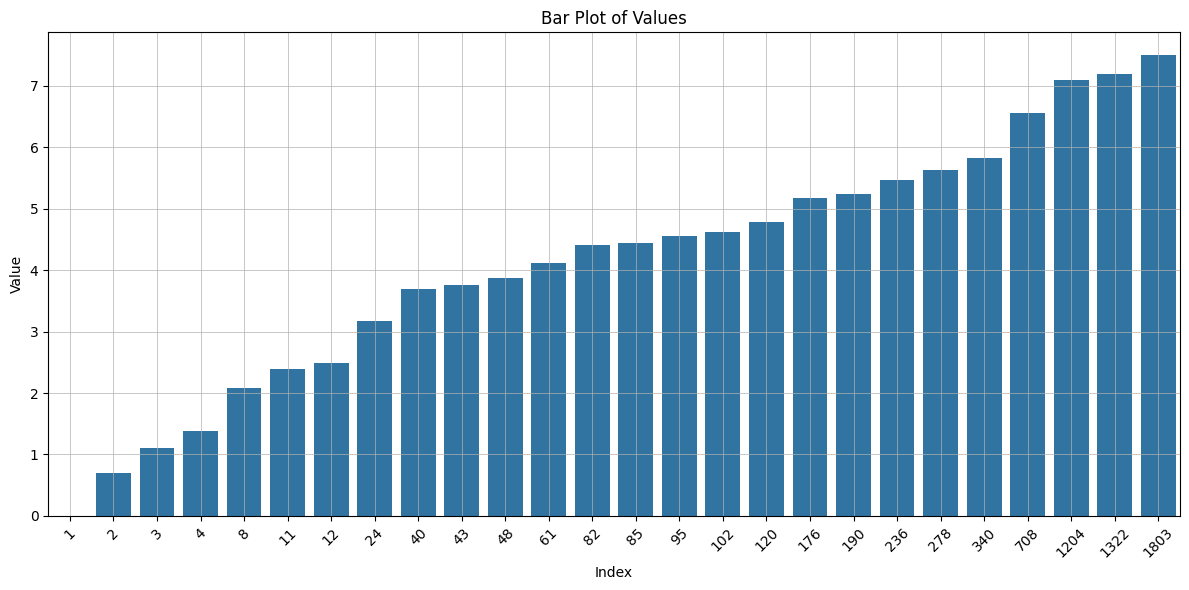

In [187]:



# Create data
values = combinations_log

# Create DataFrame
df = pd.DataFrame({'Value': values})

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Value', x=combinations)

# Customize plot
plt.title('Bar Plot of Values')
plt.xlabel('Index')
plt.ylabel('Value')

plt.grid(True, which='major', linestyle='-', linewidth='0.5')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

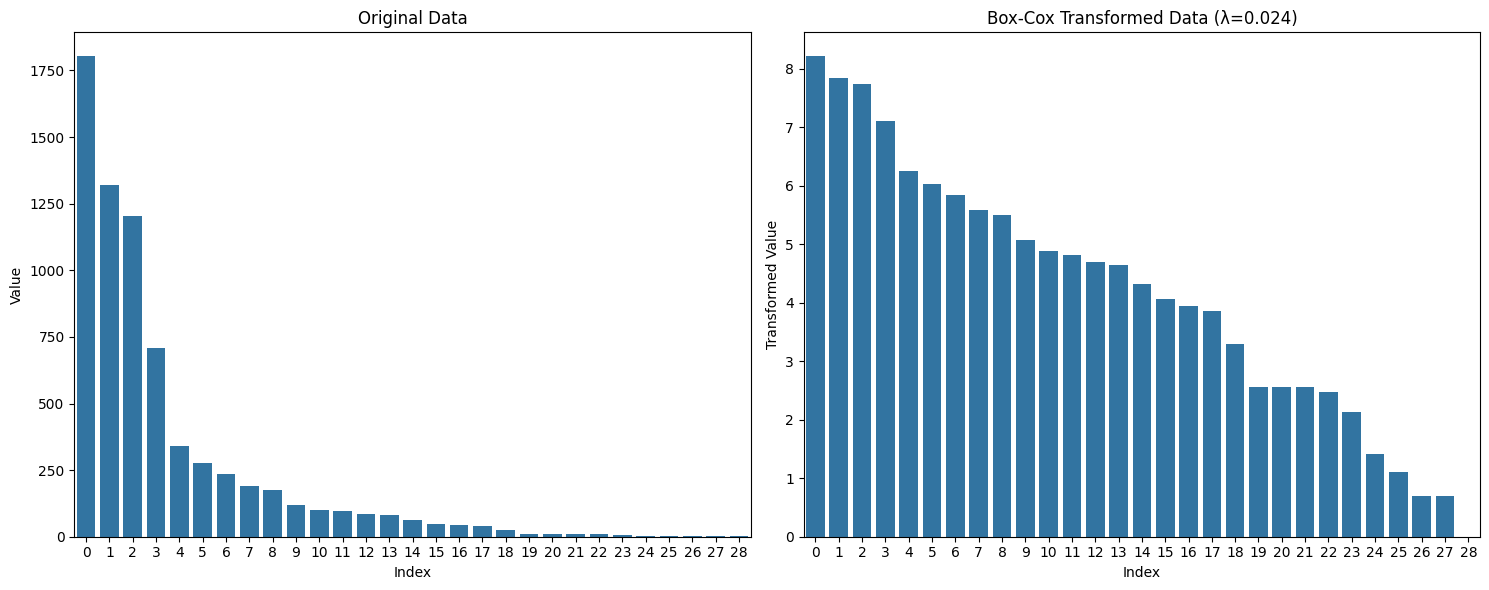

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Original values
values = [1803, 1322, 1204, 708, 340, 278, 236, 190, 176, 120, 102,
          95, 85, 82, 61, 48, 43, 40, 24, 12, 12, 12,
          11, 8, 4, 3, 2, 2, 1]

# Apply Box-Cox transformation
# Adding a small constant since Box-Cox requires strictly positive values
transformed_values, lambda_param = stats.boxcox(values)

# Create DataFrame for both original and transformed values
df = pd.DataFrame({
    'Original': values,
    'Box-Cox Transformed': transformed_values
})

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original data plot
sns.barplot(data=df, y='Original', x=df.index, ax=ax1)
ax1.set_title('Original Data')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')

# Transformed data plot
sns.barplot(data=df, y='Box-Cox Transformed', x=df.index, ax=ax2)
ax2.set_title(f'Box-Cox Transformed Data (λ={lambda_param:.3f})')
ax2.set_xlabel('Index')
ax2.set_ylabel('Transformed Value')

# Adjust layout
plt.tight_layout()
plt.show()

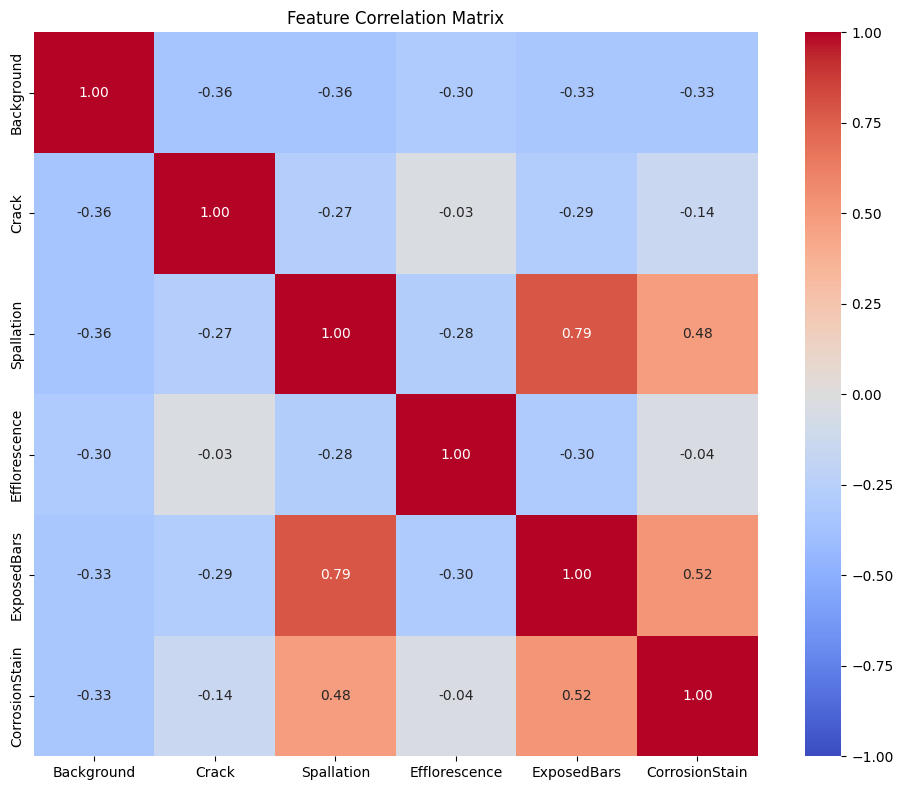


Strongest Correlations:
Spallation - ExposedBars: 0.787
ExposedBars - CorrosionStain: 0.523
Spallation - CorrosionStain: 0.478
Background - Spallation: -0.359
Background - Crack: -0.357


In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations


feature_columns = ['Background', 'Crack', 'Spallation', 'Efflorescence', 'ExposedBars', 'CorrosionStain']

corrplot_titles = ['Background', 'Crack \n(Pęknięcie)', 'Spallation \nKruszenie',
                   'Efflorescence \nWykwity wapniowe', 'ExposedBars \nPręty sprężane widoczne', 'CorrosionStain \nZacieki od korozji']

# Create correlation matrix
corr_matrix = np.zeros((len(feature_columns), len(feature_columns)))
np.fill_diagonal(corr_matrix, 1.0)  # Fill diagonal with 1s

# Calculate correlations
for (i, col1), (j, col2) in combinations(enumerate(feature_columns), 2):
    correlation = df[col1].corr(df[col2])
    corr_matrix[i, j] = correlation
    corr_matrix[j, i] = correlation  # Make matrix symmetric

# Convert to DataFrame for better visualization
corr_df = pd.DataFrame(corr_matrix, columns=feature_columns, index=feature_columns)

# Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df,
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Red-blue colormap
            vmin=-1, vmax=1,  # Set correlation range
            center=0,  # Center the colormap at 0
            square=True,  # Make cells square
            fmt='.2f')  # Format correlation values to 2 decimal places

plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\nStrongest Correlations:")
print("=======================")
correlations = []
for (i, col1), (j, col2) in combinations(enumerate(feature_columns), 2):
    correlations.append((col1, col2, corr_matrix[i, j]))

# Sort by absolute correlation value
sorted_correlations = sorted(correlations, key=lambda x: abs(x[2]), reverse=True)

# Print top 5 strongest correlations
for col1, col2, corr in sorted_correlations[:5]:
    print(f"{col1} - {col2}: {corr:.3f}")

In [235]:
#Calculating pca between most correlated feature
import src.constants as c
import prince

mca = prince.MCA(one_hot=False, n_components=1)
mca.fit([df.Spallation])



KeyError: "None of [Index(['Spallation', 'ExposedBars'], dtype='object')] are in the [columns]"

In [257]:
import pandas as pd

# Example DataFrame
data = {'Column1': [0, 1, 0, 1], 'Column2': [1, 0, 0, 1]}
df2 = pd.DataFrame(data)

# Merge columns
df['Spallation_ExposedBars'] = df[[c.SPALLATION, c.EXPOSEDBARS]].max(axis=1)

print(df[df.Spallation | df.ExposedBars].value_counts())

print(df.Spallation.value_counts())
print(df.ExposedBars.value_counts())

KeyError: "None of [Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       ...\n       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n      dtype='int32', length=10462)] are in the [columns]"

In [261]:
data = {
    'Column1': [0, 1, 0, 1, 0],
    'Column2': [0, 0, 1, 1, 0]
}

df2 = pd.DataFrame(data)

# Merge columns using the given principle
df['Merged'] = (df[c.SPALLATION] | df[c.EXPOSEDBARS])

print(df['Merged'].value_counts())

Merged
0    7135
1    3327
Name: count, dtype: int64
